[Indice](index.ipynb) | Previo: [ProblemaNCuerpos.TeoremaVirial](06.03.00.00.ProblemaNCuerpos.TeoremaVirial.ipynb) | Siguiente: [ProblemaNCuerpos.SolucionNumerica.ConstantesMovimiento](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ConstantesMovimiento.ipynb)

## 6.4. Solución numérica
<a id='ncuerpos_solucion_numerica'></a>

Como mencionamos en la [Sección *Formulación del problema de los N cuerpos*](06.01.00.00.ProblemaNCuerpos.Formulacion.ipynb#ncuerpos_formulacion), contrario a lo que dice el mito popular, para finales de los 1900, el problema de los N cuerpos había sido resuelto finalmente <cite data-cite="Sundman1913ThreeBody"><a href="mybook.html#Sundman1913ThreeBody">(Sundman, 1913</a></cite>,<cite data-cite="Wang1990GlobalSolution"><a href="mybook.html#Wang1990GlobalSolution">Wang, 1990</a></cite>,<cite data-cite="Babadzhaniants1993"><a href="mybook.html#Babadzhaniants1993">Babadzhaniants, 1993)</a></cite>.  Es decir, hoy conocemos series convergentes que permiten calcular con precisión arbitraria la posición y velocidad de un número cualquiera de partículas siempre y cuando su momento angular total sea cero; o de hasta tres partículas si el momento angular es distinto de cero <cite data-cite="Sundman1913ThreeBody"><a href="mybook.html#Sundman1913ThreeBody">(Sundman, 1913)</a></cite>.  Sin embargo, la convergencia de esas series es tan lenta que en términos prácticos su utilidad es casi nula.  Más allá entonces de demostrar que la solución analítica es posible, estos trabajos no resolvieron el problema, también urgente, de encontrar fórmulas que puedan usarse en situaciones reales para predecir la posición de un sistema de partículas que interactúan gravitacionalmente.

Hoy por hoy, el método más utilizado por los astrónomos e ingenieros aeroespaciales para la solución al problema de los N cuerpos en mecánica celeste consiste en resolver numéricamente las ecuaciones de movimiento del sistema.  En las próximas secciones exploraremos algunos algoritmos, métodos y herramientas para obtener dicha solución y que serán de utilidad en el resto del libro. 

Si bien podría pensarse que presentar en este punto del libro la solución numérica al problema de los N cuerpos  agota el problema y reduce la mecánica celeste a la aplicación de un conjunto de técnicas numéricas, nada esta en realidad más lejos de la verdad.  Como veremos en los próximos capítulos, aún en la ausencia de una solución analítica práctica y en presencia de poderosos métodos numéricos para aproximar la solución para configuraciones arbitrarias de cuerpos, existen muchos resultados teóricos de interés que permiten describir analíticamente una amplia diversidad de sistemas físicos.  La introducción de métodos numéricos en esta parte del libro tiene el propósito de proveernos un conjunto de poderosas herramientas que permitiran poner a prueba los desarrollos teóricos del resto del libro.  

De alguna manera, las herramientas introducidas aquí nos permitirán construir laboratorios virtuales de mecánica celeste para poner a prueba nuestras ideas teóricas.  Un laboratorio del que lamentablemente no disponíamos en la naturaleza antes del advenimiento de los computadores.

### 6.4.1. Unidades canónicas
<a id='unidades_canonicas'></a>

La fuerza gravitacional es la fuerza más débil del Universo.  Por esta razón el valor de la constante que determina su intensidad $G$ es muy pequeño, por lo menos cuando es medido en las unidades que hemos definido en la vida cotidiana para los patrones de longitud, tiempo y masa.  En el Sistema Internacional $G\sim 10^{-10}$ (en lo sucesivo $\sim$ no se usará para indicar el valor aproximado de una cantidad, sino su *orden de magnitud*.)

De otro lado, en Astronomía, las cantidades involucradas en el cálculo de la fuerza gravitacional (Ec. [fuerza_gravitacional](#mjx-eqn-eq%3Afuerza_gravitacional)), es decir, las masas de los cuerpos $m_i$ y sus distancias mutuas $r_{ij}$, tienen valores enormes en esas mismas unidades.  Así por ejemplo en el sistema Tierra-Sol, $m\sim 10^{24}-10^{30}$ kg y $r\sim 10^{11}$ m.  

Con el propósito de evitar la combinación de cantidades muy grandes y muy pequeñas en las mismas ecuaciones, se ha convenido en utilizar un sistema de unidades en el cuál todas las cantidades implicadas tengan, por un lado, una magnitud similar y por el otro sus valores sean de orden uno.  

Resulta notable que las dimensiones o unidades de la constante de gravitación universal $G$:

$$
[G] = \frac{L^3}{M T^2},
$$
combinen los patrones usados para definir todas las cantidades físicas relevantes en mecánicos.  Este hecho implica, que si ajustamos el valor de estas tres unidades fundamentales, podríamos obtener casi cualquier valor que desearamos para $G$.

Supongamos, por ejemplo, que definimos un sistema de unidades nuevo, ${\cal L}$, ${\cal M}$, ${\cal T}$ (que denotan la unidad de longitud, masa y tiempo respectivamente), para el cual, en unidades del SI, los factores de conversión son iguales a $U_L$, $U_M$ y $U_T$ respectivamente.  En este sistema de unidades, para convertir, por ejemplo, una distancia medida en $\cal L$ a la misma distancia pero medida en $m$ (metros) es necesario multiplicar la distancia por $U_L$.

Así por ejemplo, en astronomía podríamos escoger medir las longitudes (y todas las cantidades derivadas) en *Unidades Astronómicas* (UA o AU, por sus siglas en inglés), en lugar de hacerlo en metros.  Como sabemos que 1 AU $=1.496\times 10^{8}$ km $=1.496\times 10^{11}$ m, entonces en este sistema de unidades, ${\cal L}:{\rm AU}$ y $U_L=1.496\times 10^{11}$ m.  Así mismo, podríamos escoger medir la masa en unidades de la masa del sol $M_\odot$ (como se acostumbra hacerlo por ejemplo en astronomía estrelar).  En este caso ${\cal M}:M_\odot$, $U_M=1.98\times 10^{30}$ kg

El propósito original de las unidades canónicas en mecánica celeste es conseguir que, en este nuevo sistema de unidades, el valor de la constante de gravitación universal sea pequeño y de orden 1.  Dada la arbitrariedad de nuestra elección, podemos ir más lejos e imponer la condición de que la constante tenga un valor exactamente igual a 1.  Así, los cálculos en los que aparezca la constante se simplificarán considerablemente.

En el sistema definido en el ejemplo antes, si escogemos una unidad de tiempo $\cal T$ tal que $U_T=5033865$ segundos (ver justificación abajo), el valor de la constante de gravitación será:

\begin{eqnarray*}
G & = & 6.67308\times 10^{-11} \frac{{\rm m}^3}{{\rm kg}\cdot{\rm s}^2}\times\left(\frac{\rm AU}{1.496\times 10^{11}\;\rm m}\right)^3\left(\frac{1.98\times 10^{30}\;\rm kg}{M_\odot}\right)^2\left(\frac{5033865\;\rm s}{\cal T}\right)\\
  & = & 1 \frac{{\rm AU}^3}{{M_\odot} {\cal T}^2}
\end{eqnarray*}

Decimos que AU, $M_\odot$, $\cal T$ forman un conjunto de unidades canónicas.

> **Definición 6.11. Unidades canónicas.**<a id=''></a> A un conjunto de unidades $\cal L, M, T$ con factores de conversión $U_L, U_M, U_T$ se los llama *unidades canónicas* en mecánica celeste, si se cumple que: 

  $$
  G \frac{U_M^2 U_T}{U_L^3} = 1 \frac{{\cal L}^3}{{\cal M}\cdot{\cal T}^2}
  $$
  
> donde $G=6.67308\times 10^{-11} {\rm m}^3{\rm kg}^{-1}{\rm s}^{-2}$.  En términos estrictamente numéricos, un sistema de unidades canónicas es aquel en el que se cumple la igualdad:

  \begin{equation}
  \label{eq:definicion_unidades_canonicas}
  G = \frac{U_L^3}{U_M^2 U_T}
  \end{equation}

En la práctica, en la Ec. ([definicion_unidades_canonicas](#mjx-eqn-eq%3Adefinicion_unidades_canonicas)), si fijamos el valor de dos de los factores de conversión, podemos encontrar el valor del tercer factor.  

En el ejemplo anterior, una vez definimos $U_L=1.496\times 10^{11}$ m y $U_M=1.98\times 10^{30}$ kg, entonces

$$
U_T = \sqrt{\frac{U_L^3}{G U_M}},
$$
que numéricamente es:

In [1]:
G=6.67308e-11 # m^3/kg/s
UL=1.496e11 #m
UM=1.98e30 #kg

UT=(UL**3/(G*UM))**0.5 #s

In [2]:
from pprint import pprint
print(f"""
UT = {UT} segundos
   = {UT/3600} horas 
   = {UT/86400} días 
   = {UT/(365.256363004*86400)} años
""")


UT = 5033865.755208481 segundos
   = 1398.296043113467 horas 
   = 58.26233512972779 días 
   = 0.15951080126450734 años



> **Nota: Escalas naturales en un sistema gravitacional.**<a id=''></a> Es interesante anotar que el valor del factor de conversión de tiempo $U_T$ obtenido con este procedimiento no es completamente arbitrario. Cuando $U_T$ se expresa en años, su valor es diferente, por poco menos de un factor de 10, del período de revolución de la Tierra alrededor del Sol (1 año).  Esto hecho es notable en tanto para deducir el valor esta *escala de tiempo* nos valimos únicamente del valor de la constante gravitacional, la masa del sol y la distancia de la Tierra.  No fue necesario resolver las ecuaciones de movimiento o tener una teoría completa del movimiento orbital.

> Decimos que la **escala de tiempo** característica de la dinámica sistema Tierra-Sol (que podríamos considerar similar al período orbital de la Tierra) se puede estimar combinando apropiadamente la constante de gravitación universal (intensidad de la interacción) con la masa del sistema y la separación característica de los cuerpos que lo constituyen. Un procedimiento similar puede usarse para obtener, a partir de la constante de gravitación, la **escala de longitud** (en caso que se provean las unidades de masa y tiempo) o la **escala de masa** (en caso que se provean las unidades de longitud y tiempo) de un sistema físico.

A partir del sistema de unidades canónicas introducidas, es posible definir los patrones de medida para todas las restantes cantidades mecánicas:

In [3]:
UV=UL/UT
UA=UL/UT**2
UF=UM*UA
UP=UM*UV
UH=UM*UL*UP
UE=UM*UL**2/UT**2

In [4]:
print(f"""
    Velocidad, UV = {UV} m/s
    Aceleración, UA = {UA} m/s^2
    Fuerza, UF = {UF} N
    Momento lineal, UP = {UP} kg m/s
    Momento angular, UH = {UH} kg m^2/s
    Energía, UE = {UE} kg m^2/s^2
""")


    Velocidad, UV = 29718.710683774327 m/s
    Aceleración, UA = 0.005903755111670335 m/s^2
    Fuerza, UF = 1.1689435121107264e+28 N
    Momento lineal, UP = 5.884304715387317e+34 kg m/s
    Momento angular, UH = 1.7429781311354465e+76 kg m^2/s
    Energía, UE = 1.7487394941176467e+39 kg m^2/s^2



De nuevo, como sucede con la unidad de tiempo, estas unidades no son solo el producto de operaciones aritméticas entre cantidades "arbitrarias".  Sus valores nos dan una idea de las escalas (valores típicos) de cada cantidad en el sistema. 

Así, por ejemplo, la unidad de velocidad, $U_V\approx 29.8$ km/s coincide con la velocidad orbital promedio de la Tierra alrededor del Sol; la unidad de aceleración $U_A\approx 0.006$ m/s$^2$ es del orden de la aceleración de la gravedad del Sol medida a la distancia promedio de la Tierra al Sol, etc.

> **Historias de la mecánica celeste: Unidades canónicas.**<a id=''></a> La motivación presentada aquí para la introducción de las unidades canónicas no es la misma que la que se esboza en textos clásicos de la disciplina. En realidad en distintos tiempos, han sido otras las razones para usar un sistema de unidades propio en mecánica celeste.

> Particularmente interesantes, son las razones expuestas en el texto clásico de Roger Bate, Donald Mueller y Jerry White, "*Fundamentals of Astrodynamics*" <cite data-cite="Bate1971Astrodynamics"><a href="mybook.html#Bate1971Astrodynamics">(Bate et al., 1971)</a></cite>.  De acuerdo a Bate y colaboradores, después de la segunda guerra mundial durante la que se desarrollaron los primeros misiles balísticos de largo alcance (los temidos V2), quedo claro que los humanos podríamos alcanzar el espacio y viajar por nuestro sistema planetario. Para navegar el Sistema Solar, sin embargo, era necesario conocer muy bien las masas y distancias relativas de los grandes cuerpos astronómicos que dominarían la dinámica de esos vehículos espaciales.  Para la época, sin embargo (incluso para 1971, cuando fue escrito el texto de Bate y compañía) el valor de la distancia Tierra-Sol y la masa de nuestra estrella, no eran conocidas con gran precisión.  Este hecho motivo a muchos a resolver los primeros problemas de mecánica celeste práctica o *mecánica orbital*, asignando a estas cantidades desconocidas un valor de 1 (unidades de masa y distancia) y calculando todas las propiedades relevantes del problema en términos de ellas.  Este fue el origen del uso de unidades canónicas, al menos, en el contexto de la mecánica orbital de finales de los 1900.

### 6.4.2. Las ecuaciones de movimiento reducidas
<a id='ncuerpos_edmr'></a>

En unidades canónica, las ecuaciónes de movimiento del sistema de N cuerpos se escriben de la misma manera que en la Ec. ([ncuerpos_formulacion_ecuaciones](#mjx-eqn-eq%3Ancuerpos_formulacion_ecuaciones)):

\begin{equation}
\label{eq:ncuerpos_numerico_ecuaciones}
\left\{\ddot{\vec r}_i= -\sum_{j\neq i} \frac{\mu_j}{r_{ij}^3} \vec{r}_{ij} \right\}_{N}
\end{equation}

La diferencia es que ahora $\mu_j=m_j$.

> **Nota: Unidades del parámetro gravitacional.**<a id=''></a> El hecho de que en unidades canónicas el valor numérico del parámetro gravitacional de un cuerpo $\mu=Gm$ coincida con el valor la masa $m$, no debe llevarnos a confundir las dos cantidades físicas. No debemos perder de vista que el patrón de $\mu$ es $L^3/T^2$, mientras que el de $m$ es, por definición, $M$.  En la igualdad $\mu_j=m_j$ se "oscurece" el efecto que tiene la constante gravitacional en el equilibrio dimensional (las unidades a ambos lados de la ecuación no son las mismas.)  En términos rigurosos $\mu_j=m_j$ es una expresión dimensionalmente incorrecta, pero es común que se use esta sustitución en algunos contextos.  No debemos nunca perder de vista este hecho, especialmente cuando manipulamos sistemas físicos reales.

Con el propósito de resolver numéricamente este sistema de ecuaciones diferenciales, usando los métodos y herramientas que introdujimos en la [Sección *Integración numérica de la e.d.m.*](05.01.03.00.Mecanica.Cinematica.SolucionNumerica.ipynb#integracion_numerica_edm), es necesario primero escribir las ecuaciones ([ncuerpos_numerico_ecuaciones](#mjx-eqn-eq%3Ancuerpos_numerico_ecuaciones)) en su forma reducida más general (Ec. [ecuaciones_reducidas](#mjx-eqn-eq%3Aecuaciones_reducidas)):

$$
\{\dot{Y_i} = f_i(\{Y_k\},t)\}_{6N},
$$
y para ello, primero debemos introducir las funciones auxiliares $Y_i(t)$ que identificaremos con las funciones relevantes en el problema $\{x_i(t),y_i(t),z_i(t),{\dot x}_i(t),{\dot y}_i(t),{\dot z}_i(t)\}_N$.  

Una elección *posible* de esta identificación puede ser la siguiente:

$$
\begin{array}{ccc}
Y_0 = x_{0}, & Y_1 = y_{0}, & Y_2 = z_{0}\\
Y_3 = x_{1}, & Y_4 = y_{1}, & Y_5 = z_{1}\\
& \ldots & \\
Y_{3N-3} = x_{N-1}, & Y_{3N-2} = y_{N-1}, & Y_{3N-1} = z_{N-1}\\
Y_{3N+0} = {\dot x}_{0}, & Y_{3N+1} = {\dot y}_{0}, & Y_{3N+2} ={\dot z}_{0}\\
Y_{3N+3} = {\dot x}_{1}, & Y_{3N+4} = {\dot y}_{1}, & Y_{3N+5} ={\dot z}_{1}\\
& \ldots & \\
Y_{6N-3} = {\dot x}_{N-1}, & Y_{6N-2} = {\dot y}_{N-1}, & Y_{6N-1} ={\dot z}_{N-1}\\
\end{array}
$$
es decir, asignaremos a la primera mitad de los elementos de la lista $\{Y_i\}$ las coordenadas de las partículas (en total $3N$ funciones) y a la segunda mitad las componentes de las velocidades respectivas (otras $3N$ funciones.)  

Podrían usarse asignaciones diferentes.  Sin embargo, esta manera de separar las coordenadas y las componentes de las velocidades, permiten escribir las reglas de indentificación de una forma general como:

\begin{equation}
\label{eq:numerico_variables_auxiliares}
\begin{array}{ccc}
Y_{3i} = x_{i}, & Y_{3i+1} = y_{i}, & Y_{3i+2} = z_{i}\\
Y_{3N+3i} = {\dot x}_{i}, & Y_{3N+3i+1} = {\dot y}_{i}, & Y_{3N+3i+2} ={\dot z}_{i}
\end{array}
\end{equation}

Con $i=0,1,2,\ldots,N-1$.

Ahora bien, para la partícula $i$, la Ec. ([ncuerpos_numerico_ecuaciones](#mjx-eqn-eq%3Ancuerpos_numerico_ecuaciones)) se puede escribir en términos de las funciones originales como:

$$
\begin{array}{lll}
\ddot{x}_i & = & -\sum_{j\neq i} \mu_j (x_i-x_j) / r_{ij}^3 \\
\ddot{y}_i & = & -\sum_{j\neq i} \mu_j (y_i-y_j) / r_{ij}^3 \\
\ddot{z}_i & = & -\sum_{j\neq i} \mu_j (z_i-z_j) / r_{ij}^3 \\
\end{array}
$$

Con $r_{ij}=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2}$.  

Pero en términos de las funciones auxiliares y las identificaciones definidas anteriormente, estas ecuaciones se puede escribir como:

$$
\begin{array}{lll}
\dot{Y}_{3N+3i} & = & -\sum_{j\neq i} \mu_j (Y_{3i}-Y_{3j}) / r_{ij}^3 \\
\dot{Y}_{3N+3i+1} & = & -\sum_{j\neq i} \mu_j (Y_{3i+1}-Y_{3j+1}) / r_{ij}^3 \\
\dot{Y}_{3N+3i+2} & = & -\sum_{j\neq i} \mu_j (Y_{3i+2}-Y_{3j+2}) / r_{ij}^3 \\
\end{array}
$$
con 

\begin{equation}
\label{eq:definicion_rij}
r_{ij}=\sqrt{(Y_{3i}-Y_{3j})^2+(Y_{3i+1}-Y_{3j+1})^2+(Y_{3i+2}-Y_{3j+2})^2}
\end{equation}

Las ecuaciones de movimiento en términos de las funciones auxiliares se pueden escribir de forma general:

$$
\dot{Y}_k = -\sum_{j\neq i} \mu_j (Y_{3i+l}-Y_{3j+l}) / r_{ij}^3 
$$

Donde $k=3N, 3N+1, \ldots, 6N-1$, $l=k\;{\rm mod}\;3$ (residuo de la división de $k$ entre 3, que siempre será un número entre 0 y 2) e $i=\lfloor (k-3N)/3\rfloor$ (valor entero más pequeño que el número resultante de dividir $k-3N$ por 3).

Con la asignación anterior, las e.d.m.r. del problema de los N cuerpos se pueden escribir finalmente como:

\begin{equation}
\label{eq:ncuerpos_edmr}
\dot Y_k = 
\left\{
\begin{array}{ccc}
Y_{3N+k} & {\rm ,} & 0 \leq k < 3N \\
-\sum_{j\neq i} \mu_j (Y_{3i+l}-Y_{3j+l}) / r_{ij}^3  & {\rm ,} & 3N\leq k < 6N 
\end{array}
\right.
\end{equation}
donde $l=k\;{\rm mod}\;3$ e $i=\lfloor (k-3N)/3\rfloor$ y $r_{ij}$ esta definido por Ec. ([definicion_rij](#mjx-eqn-eq%3Adefinicion_rij)).

### 6.4.3. Algoritmo de solucion
<a id='ncuerpos_algoritmo_solucion'></a>

Para resolver numéricamente las e.d.m.r. del problema de los N cuerpos usando los métodos introducidos en la [Sección *Integración numérica de la e.d.m.*](05.01.03.00.Mecanica.Cinematica.SolucionNumerica.ipynb#integracion_numerica_edm), debemos implementar primero las Ecs. ([ncuerpos_edmr](#mjx-eqn-eq%3Ancuerpos_edmr)) como una rutina:

<a id='code:edm_ncuerpos'></a>

In [5]:
def edm_ncuerpos(Y,t,N=2,mus=[]):    
    from numpy import zeros,floor
    dYdt=zeros(6*N)

    #Primer conjunto de ecuaciones
    dYdt[:3*N]=Y[3*N:]
    
    #Segundo conjunto de ecuaciones
    for k in range(3*N,6*N):
        l=k%3
        i=int(floor((k-3*N)/3))
        for j in range(N):
            if j==i:continue
            rij=(Y[3*i]-Y[3*j])**2+\
                (Y[3*i+1]-Y[3*j+1])**2+\
                (Y[3*i+2]-Y[3*j+2])**2
            dYdt[k]+=-mus[j]*(Y[3*i+l]-Y[3*j+l])/rij**1.5
            
    return dYdt

Para ilustrar la solución al problema, supongamos que queremos predecir la posición en $t=1$ (en unidades canónicas) de las partículas que conforman el sistema mostrado en la Figura ([ncuerpos_numerico_ejemplo](#fig:ncuerpos_numerico_ejemplo)). 

<a id='fig:ncuerpos_numerico_ejemplo'></a>![Sistema de tres cuerpos de ejemplo (todas las cantidades están expresadas en unidades canónicas)++t++1.0++\label{fig:ncuerpos_numerico_ejemplo}](./figures/horizontal_ncuerpos_ejemplo.png)

<center><b>Figura 6.68</b>. Sistema de tres cuerpos de ejemplo (todas las cantidades están expresadas en unidades canónicas)</center>

Las propiedades del sistema (masas y número de partículas) y las condiciones iniciales indicadas en la Figura, pueden expresarse, en términos de las variables auxiliares $\{Y_k\}$, de la siguiente manera:

In [6]:
#Número de partículas
N=3
#Parámetros gravitacionales o masas de las partúclas
mus=[1.0,0.2,0.5]
#Estado inicial del sistema
Y0s=[
    #Posición cuerpo 0
    0,0,0,
    #Posición cuerpo 1
    1,0,0,
    #Posición cuerpo 2
    -1,0,0,
    #Velocidad cuerpo 0
    0,0,0,
    #Velocidad cuerpo 1
    0,1,0,
    #Velocidad cuerpo 2
    0,-1,0,
  ]

La solución la obtenemos usando `odeint`:

In [7]:
from scipy.integrate import odeint
solucion=odeint(edm_ncuerpos,Y0s,[0.0,1.0],args=(3,mus))

In [8]:
print("Solución:\n")
pprint(solucion)

Solución:

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -1.        ,  0.        ],
       [-0.15068697, -0.06168292,  0.        ,  0.49242022,  0.83105115,
         0.        , -0.49559416, -0.80905462,  0.        , -0.29283302,
        -0.20870151,  0.        , -0.91545262,  0.52712521,  0.        ,
         0.95184709, -0.39344707,  0.        ]])


La matriz resultante tiene, como filas, el estado de las partículas del sistema para cada uno de los instantes provistos en el vector de valores de tiempo (en este caso `[0.0,1.0]`).  Así, la fila 0 no es otra cosa que las mismas condiciones iniciales provistas.  Por otro lado, la fila 1 contiene el estado del sistema en el tiempo $t=1$, que es justamente la información que necesitabamos obtener.

Las columnas de la matriz de solución, por otro lado, contienen los valores de la variable auxiliar $Y_k$, que a su vez corresponden a las posiciones y velocidades de las partículas, de acuerdo a las reglas definidas en Ec. ([numerico_variables_auxiliares](#mjx-eqn-eq%3Anumerico_variables_auxiliares)).  Así, las columnas 0, 1 y 2, contienen el vector posición de la partícula 0.  Las columnas 3, 4 y 5, la posición de la partícula 1 y las columnas 6, 7 y 8, la posición de la partícula 2.  De otro lado, las columnas 9, 10 y 11, contendrán las componentes de la velocidad de la partícula 0 y así sucesivamente.

Una forma más apropiada de manipular la matriz solución puede ser asignar el valor de sus columnas a vectores (o mejor, matrices) con nombres que nos recuerden el hecho que almacenan posiciones y velocidades de las diferentes partículas.  Así por ejemplo, las posiciones y velocidades de la partícula 0, en cada uno de los tiempos en los que se realiza la integración, ${\vec r}_0(t),\dot{\vec r}_0(t)$, pueden almacenarse usando las matrices `r0s` y `v0s`:

In [9]:
r0s=solucion[:,0:3]
v0s=solucion[:,9:12]

In [10]:
print(f"r_0(t)\n= {r0s}")
print(f"v_0(t)\n= {v0s}")

r_0(t)
= [[ 0.          0.          0.        ]
 [-0.15068697 -0.06168292  0.        ]]
v_0(t)
= [[ 0.          0.          0.        ]
 [-0.29283302 -0.20870151  0.        ]]


En general, las posiciones o velocidades de todas las partículas del sistema, ${\vec r}_i(t)$, $\dot{\vec r}_i(t)$, pueden almacenarse en matrices `rs` o `vs`, tal que, para obtener para una partícula, el valor de una componente del vector posición o de la velocidad, en un determinado tiempo, la regla será: 

```python
  rs[Partícula,Tiempo,Componente]
  vs[Partícula,Tiempo,Componente]
```

Así, `rs[0,1,2]` corresponderá a la coordenada z (componente 2), en el tiempo 1, para la partícula 0. Por su parte `vs[1,:,0]` serán todos los valores (elipsis `:`) de la coordenada $x$ (componente 0), para la partícula 1.  

El algoritmo para convertir la matriz de solución en `rs` y `vs` se presenta a continuacón:

<a id='code:solucion_a_rs_vs'></a>

In [11]:
import numpy as np
rs=np.zeros((N,2,3))
vs=np.zeros((N,2,3))
for i in range(N):
    rs[i]=solucion[:,3*i:3*i+3]
    vs[i]=solucion[:,3*N+3*i:3*N+3*i+3]

In [12]:
print(f"rs = \n{rs}")
print(f"vs = \n{vs}")

rs = 
[[[ 0.          0.          0.        ]
  [-0.15068697 -0.06168292  0.        ]]

 [[ 1.          0.          0.        ]
  [ 0.49242022  0.83105115  0.        ]]

 [[-1.          0.          0.        ]
  [-0.49559416 -0.80905462  0.        ]]]
vs = 
[[[ 0.          0.          0.        ]
  [-0.29283302 -0.20870151  0.        ]]

 [[ 0.          1.          0.        ]
  [-0.91545262  0.52712521  0.        ]]

 [[ 0.         -1.          0.        ]
  [ 0.95184709 -0.39344707  0.        ]]]


Finalmente, con la solución parametrizada apropiadamente, podemos escribir el algoritmo requerido para mostrar, gráficamente la posición de las partículas en el espacio:

In [13]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


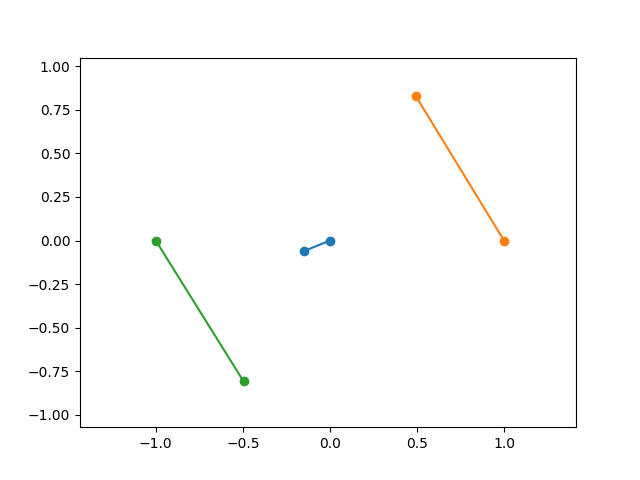

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

for i in range(N):
    ax.plot(rs[i,:,0],rs[i,:,1],marker='o');

from pymcel.plot import fija_ejes_proporcionales
fija_ejes_proporcionales(ax,rs);



<a id='fig:06.03.00.00.ProblemaNCuerpos.SolucionNumerica_69'></a><center><b>Figura 6.69.</b> Posiciones y velocidades de las partículas en el sistema de ejemplo, en el tiempo inicial y en $t=1$ (en unidades canónicas).</center>

Todo el procedimiento descrito en los códigos anteriores, puede condensarse en pocas líneas, si se diseñan rutinas adecuadas para convertir las condiciones iniciales de un sistema de partículas en el vector de valores iniciales de las variables auxiliares `Y0s` o para convertir la matriz de solución en las matrices de posición `rs` y velocidad `vs`. 

Podemos, por ejemplo, expresar las condiciones iniciales del sistema usando una estructura de datos más *legible*, p.e. una lista de diccionarios:

In [15]:
sistema_ejemplo=[
    dict(m=1.0,r=[0.0,0.0,0.0],v=[0.0,0.0,0.0]),
    dict(m=0.2,r=[1.0,0.0,0.0],v=[0.0,1.0,0.0]),
    dict(m=0.5,r=[-1.0,0.0,0.0],v=[0.0,-1.0,0.0]),
]

Para convertir esta estructura en el vector con las condiciones iniciales de las variables auxiliares usaremos la siguiente rutina:

<a id='code:sistema_a_Y'></a>

In [16]:
def sistema_a_Y(sistema):
    mus=[]
    r0s=[]
    v0s=[]
    N=0
    for particula in sistema:
        m=particula['m']
        if m>0:
            mus+=[m]
            r0s+=list(particula["r"])
            v0s+=list(particula["v"])
            N+=1
    from numpy import array
    Y0s=array(r0s+v0s)
    mus=array(mus)
    return N,mus,Y0s

Nótese que en la rutina hemos usado inicialmente listas (p.e. `mus=[]`) pero para devolver el resultado de la rutina, convertirmos esas listas en arreglos de `NumPy` (p.e. `mus=array(mus)`) que tienen propiedades más adecuadas para su manipulación posterior.  También debe tenerse cuidado con la línea `Y0s=array(rs+vs)` donde se da a entender que estamos *sumando* posiciones y velocidades (peras con manzanas.)  Debemos recordar aquí (ver la [Sección *conjuntos, tuplas y vectores*](04.01.01.00.Fundamentos.Calculo.Vectores.ipynb#conjuntos_tuplas_vectores)) que dado que en el algoritmo `rs` y `vs` son listas, la suma indica la unión de esas listas (para formar la lista `Y0s`) y no la suma vectorial de ellas.

Un último detalle codificado en la rutina `sistema_a_Y` (que usaremos mucho en lo que queda de este libro) es que si la masa de una partícula en el diccionario `sistema` se fija en 0, la partícula no será incluída en las condiciones iniciales (esa es justamente la función del condicional que comienza con `if m>0:...`.)  Esta condición puede ser de utilidad para agregar y quitar partículas a un sistema sin necesidad de borrar o comentar sus condiciones iniciales en el diccionario de `sistema`. 

Por otro lado, para convertir la matriz `solucion` en matrices de posición y velocidad, `rs` y `vs`, tal y como lo hicimos en el Alg. ([solucion_a_rs_vs](#code:solucion_a_rs_vs)), usaremos la siguiente rutina:

<a id='code:solucion_a_estado'></a>

In [17]:
def solucion_a_estado(solucion,Nparticulas,Ntiempos):
    from numpy import zeros
    rs=zeros((Nparticulas,Ntiempos,3))
    vs=zeros((Nparticulas,Ntiempos,3))
    for i in range(Nparticulas):
        rs[i]=solucion[:,3*i:3*i+3]
        vs[i]=solucion[:,3*Nparticulas+3*i:3*Nparticulas+3*i+3]
    return rs,vs

Con todos estos elementos a la mano, un algoritmo completo para expresar las condiciones iniciales del sistema en Figura ([ncuerpos_numerico_ejemplo](#fig:ncuerpos_numerico_ejemplo)), encontrar la solución numérica a las e.d.m.r. para 50 valores del tiempo entre $t_0=0.0$ y $t=5.0$ (en unidades canónicas) y visualizar la solución, será:

<a id='code:ncuerpos_ejemplo1'></a>

<IPython.core.display.Javascript object>


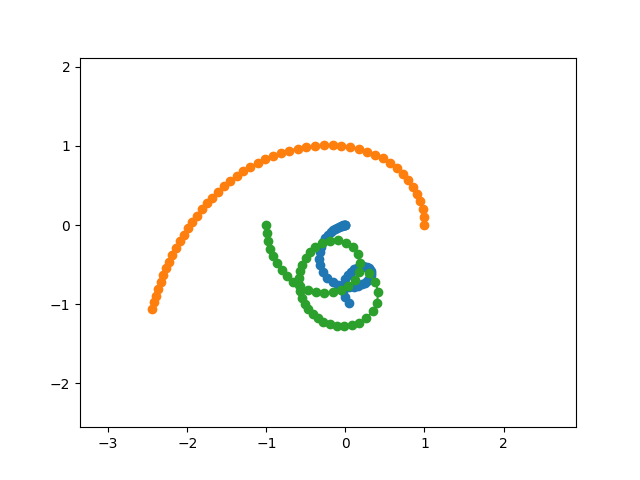

In [18]:
# Definición de las condiciones iniciales 
sistema_ejemplo=[
    dict(m=1.0,r=[0.0,0.0,0.0],v=[0.0,0.0,0.0]),
    dict(m=0.2,r=[1.0,0.0,0.0],v=[0.0,1.0,0.0]),
    dict(m=0.5,r=[-1.0,0.0,0.0],v=[0.0,-1.0,0.0]),
]
N,mus,Yo=sistema_a_Y(sistema_ejemplo)

#Tiempo de integración
import numpy as np
Nt=50
ts=np.linspace(0.0,5,Nt,endpoint=True)

# Solución al sistema de ecuaciones diferenciales
from scipy.integrate import odeint
solucion_ejemplo=odeint(edm_ncuerpos,Yo,ts,args=(N,mus))
rs,vs=solucion_a_estado(solucion_ejemplo,N,Nt)

# Componente gráfica del algoritmo
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

for i in range(N):
    ax.plot(rs[i,:,0],rs[i,:,1],marker='o');

from pymcel.plot import fija_ejes_proporcionales
fija_ejes_proporcionales(ax,rs);



<a id='code:ncuerpos_ejemplo1'></a><center><b>Figura 6.70.</b> Posiciones y velocidades de las partículas en el sistema de ejemplo, entre el tiempo inicial $t_0=0$ y $t=5$ (en unidades canónicas).</center>

Puede encontrar una versión animada o interactiva de este gráfico en la [Sección *Figuras interactivas y animaciones*](#ncuerpos_numerico_interactivas) al final de esta sección.

Dado que en general, el movimiento de los cuerpos en un sistema de muchas partículas, ocurre en el espacio de tres dimensiones, la componente gráfica del algortimo anterior puede reemplazarse con este código:

<a id='code:plot_ncuerpos_3d'></a>

In [19]:
def plot_ncuerpos_3d(rs,vs,**opciones):
    #Número de partículas
    N=rs.shape[0]
    
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=fig.gca(projection='3d')

    for i in range(N):
        ax.plot(rs[i,:,0],rs[i,:,1],rs[i,:,2],**opciones);

    from pymcel.plot import fija_ejes3d_proporcionales
    fija_ejes3d_proporcionales(ax);
    fig.tight_layout();
    plt.show();
    return fig

Que invocamos con:

<IPython.core.display.Javascript object>


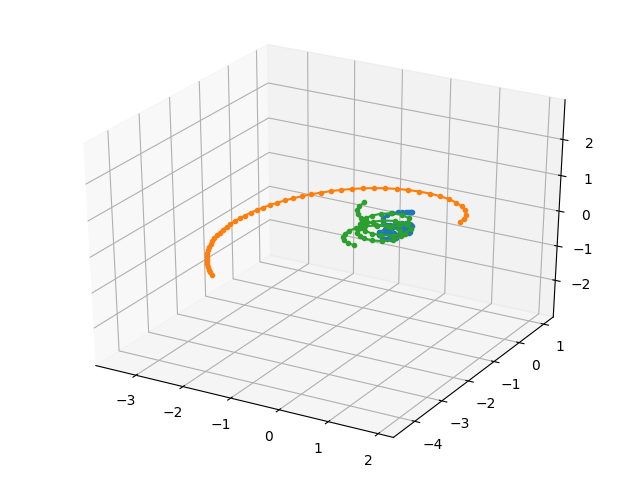

In [25]:
fig=plot_ncuerpos_3d(rs,vs,marker='.');

<a id='fig:06.03.00.00.ProblemaNCuerpos.SolucionNumerica_71'></a><center><b>Figura 6.71.</b> </center>

La diferencia de la representación en tres dimensiones de los sistemas, de su representación en dos dimensiones esta en:

- El uso del módulo `Axes3D`: `from mpl_toolkits.mplot3d import Axes3D`.

- La elección de una proyección específica al definir el espacio de graficación: `ax=fig.gca(projection='3d')`.

- El uso de las coordenadas $x,y,z$ de las posiciones de las partículas, en lugar de solo dos de ellas: 
    
  ```python
  ax.plot(rs[i,:,0],rs[i,:,1],rs[i,:,2],marker='o');
  ```
  
- Y el ajuste de las escalas de los tres ejes a través de una rutina previamente preparada en el paquete `pymcel`: `fija_ejes3d_proporcionales(ax)`.

### 6.4.4. Figuras interactivas
<a id='ncuerpos_numerico_interactivas'></a>

#### 6.4.4.1. El problema de los N cuerpos interactivo
<a id='ncuerpos_numerico_interactivos'></a>

Para preparar una versión interactiva del algoritmo de solución al problema de los N cuerpos debemos primero crear una rutina que haga lo mismo que el algoritmo, pero que reciba como argumentos, las cantidades que nos gustaría modificar con la interacción.  

Supongamos por ejemplo que deseamos mostrar el efecto que tiene el cambio de la masa 0 (que llamaremos `mcentral`), el de su posición inicial en $y$ (que llamaremos `ycentral`) y la componente $y$ de su velocidad (que llamaremos `vcentraly`).  Adicionalmente queremos visualizar a voluntad, la trayectoria del sistema hasta un tiempo `ttotal` arbitrario.  

La rutina y el código interactivo se presentan a continuación:

In [26]:
# Widgets de Jupyter
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)

# Rutina de interacción
def ncuerpos_interactivo(mcentral=1.0,ycentral=0.0,vcentraly=0.0,ttotal=5.0,Ntiempos=50):
    
    # Definición de las condiciones iniciales 
    sistema_ejemplo=[
        dict(m=float(mcentral),r=[0.0,float(ycentral),0.0],v=[0.0,float(vcentraly),0.0]),
        dict(m=0.2,r=[1.0,0.0,0.0],v=[0.0,1.0,0.0]),
        dict(m=0.5,r=[-1.0,0.0,0.0],v=[0.0,-1.0,0.0]),
    ]
    N,mus,Yo=sistema_a_Y(sistema_ejemplo)

    #Tiempo de integración
    import numpy as np
    Nt=int(Ntiempos)
    ts=np.linspace(0.0,float(ttotal),Nt,endpoint=True)

    # Solución al sistema de ecuaciones diferenciales
    from scipy.integrate import odeint
    solucion_ejemplo=odeint(edm_ncuerpos,Yo,ts,args=(N,mus))
    rs,vs=solucion_a_estado(solucion_ejemplo,N,Nt)

    # Componente gráfica del algoritmo
    import matplotlib.pyplot as plt
    fig=plt.figure()
    ax=fig.gca()

    for i in range(N):
        ax.plot(rs[i,:,0],rs[i,:,1],marker='.');

    ax.set_aspect('equal','box')
    ax.grid()

# Código de interacción
interact(ncuerpos_interactivo,
         mcentral=widgets.FloatSlider(min=0.1,max=10.0,step=0.1,value=1.0,**opciones),
         ycentral=widgets.FloatSlider(min=-2,max=2,step=0.1,value=0.0,**opciones),
         vcentralt=widgets.FloatSlider(min=-2,max=2,step=0.1,value=0.0,**opciones),
         vcentraly=widgets.FloatSlider(min=-2,max=2,step=0.1,value=0.0,**opciones),
         ttotal=widgets.Text("5.0",**opciones),
         Ntiempos=widgets.Text("50",**opciones)
        );

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='mcentral', max=10.0, min=0.…

Modifique el valor de los parámetros libres del sistema e identifique comportamientos que encuentre interesantes.

#### 6.4.4.2. Animación del problema de los N cuerpos
<a id='ncuerpos_numerico_animacion'></a>

Por su parte para crear una versión animada del sistema que estamos considerando, debemos primero crear una rutina que permita representar la posición del sistema en un tiempo individual, por ejemplo en el tiempo inicial y a continuación crear una rutina (`animacion`) que permita cambiar la gráfica de esta condición inicial a medida que pasa el tiempo.

El código resultante no es tan sencillo, pero resulta bastante útil para visualizar la dinámica del sistema:

<a id='code:ncuerpos_animacion'></a>

<IPython.core.display.Javascript object>


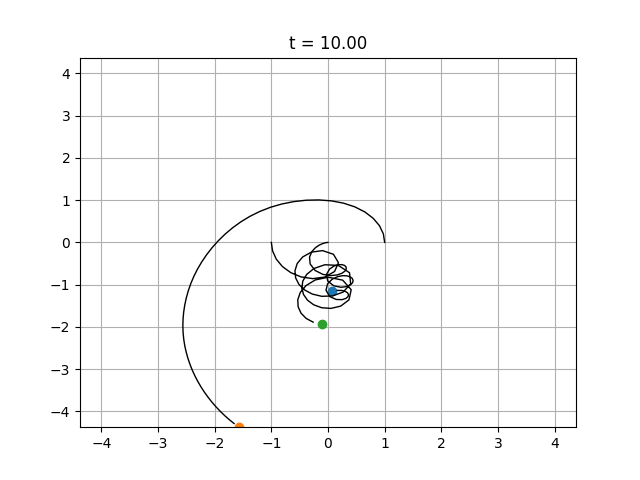

In [22]:
# Definición de las condiciones iniciales 
sistema_ejemplo=[
    dict(m=1.0,r=[0.0,0.0,0.0],v=[0.0,0.0,0.0]),
    dict(m=0.2,r=[1.0,0.0,0.0],v=[0.0,1.0,0.0]),
    dict(m=0.5,r=[-1.0,0.0,0.0],v=[0.0,-1.0,0.0]),
]
N,mus,Yo=sistema_a_Y(sistema_ejemplo)

#Tiempo de integración
import numpy as np
Nt=50
ts=np.linspace(0.0,10.0,Nt,endpoint=True)

# Solución al sistema de ecuaciones diferenciales
from scipy.integrate import odeint
solucion_ejemplo=odeint(edm_ncuerpos,Yo,ts,args=(N,mus))
rs,vs=solucion_a_estado(solucion_ejemplo,N,Nt)

# Componente gráfica del algoritmo
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

puntos=[]
lineas=[]
for i in range(N):
    punto,=ax.plot(rs[i,0,0],rs[i,0,1],marker='o',lw=0);
    linea,=ax.plot(rs[i,0,0],rs[i,0,1],marker=None,lw=1,color='k');
    puntos+=[punto]
    lineas+=[linea]

titulo=ax.set_title(f"t = {ts[0]}")
vmax=abs(rs).max()
ax.set_ylim((-vmax,vmax))
ax.set_xlim((-vmax,vmax))
ax.grid()

# Animación
from matplotlib import animation
def animacion(it):
    for i in range(N):
        puntos[i].set_data(rs[i,it,0],rs[i,it,1])
        lineas[i].set_data(rs[i,:it,0],rs[i,:it,1])
    titulo.set_text(f"t = {ts[it]:.2f}")
    return puntos,lineas

anim=animation.FuncAnimation(fig,animacion,frames=Nt,interval=50,blit=True,repeat=False);

Si desea tener más control sobre la animación puede visualizarla usando el siguiente comando:

In [23]:
from IPython.display import HTML
HTML(anim.to_jshtml())

El lector puede cambiar las condiciones iniciales en el Alg. ([animacion_ncuerpos](#code:animacion_ncuerpos)) para ver el desenlace del sistema cuando se cambian las condiciones iniciales.  También puede fijar en 0 la masa de alguna de las partículas del sistema, para reducir la simulación a solo dos partículas, o agregar una cuarta o quinta partícula.

[Indice](index.ipynb) | Previo: [ProblemaNCuerpos.TeoremaVirial](06.03.00.00.ProblemaNCuerpos.TeoremaVirial.ipynb) | Siguiente: [ProblemaNCuerpos.SolucionNumerica.ConstantesMovimiento](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ConstantesMovimiento.ipynb)